<a href="https://colab.research.google.com/github/mohripan/Machine-Learning/blob/main/LombaKorona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
covid_per_hari = pd.read_csv('https://raw.githubusercontent.com/mohripan/Machine-Learning/main/Lomba/Dataset/Kabeh/data%20covid%20perhari.csv', skiprows=[1])
covid_per_hari.head()

,TGL,Perkembangan Kasus,Unnamed: 2,Unnamed: 3
0,2-Mar-20,2,0,0
1,3-Mar-20,0,0,0
2,4-Mar-20,0,0,0
3,5-Mar-20,0,0,0
4,6-Mar-20,2,0,0


# Membetulkan Nama Kolom

In [3]:
covid_per_hari['Sembuh'] = covid_per_hari['Unnamed: 2']
covid_per_hari['Meninggal'] = covid_per_hari['Unnamed: 3']
covid_per_hari = covid_per_hari.drop('Unnamed: 2', axis=1)
covid_per_hari = covid_per_hari.drop('Unnamed: 3', axis=1)

# Mengubah variable TGL menjadi datetime

In [4]:
covid_per_hari['tanggal'] = pd.to_datetime(covid_per_hari['TGL'])
covid_per_hari = covid_per_hari.drop('TGL', axis=1)

In [5]:
covid_per_hari.head()

,Perkembangan Kasus,Sembuh,Meninggal,tanggal
0,2,0,0,2020-03-02
1,0,0,0,2020-03-03
2,0,0,0,2020-03-04
3,0,0,0,2020-03-05
4,2,0,0,2020-03-06


# Plot data

In [6]:
sns.set_theme(style="whitegrid")

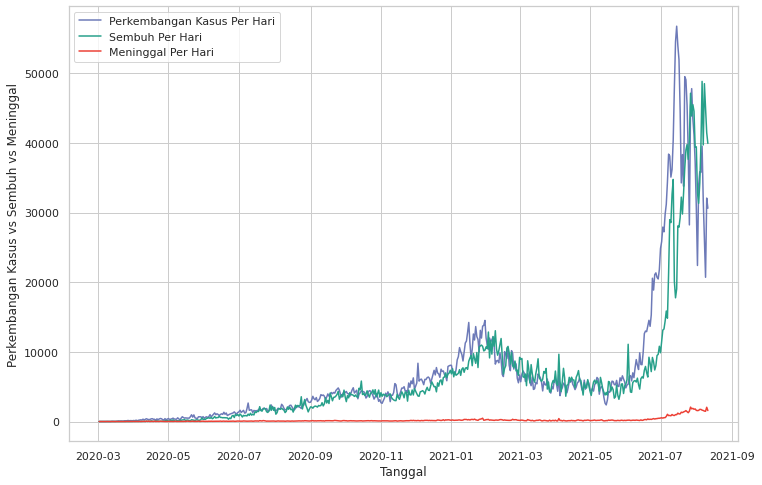

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(covid_per_hari['tanggal'], covid_per_hari['Perkembangan Kasus'],
         label='Perkembangan Kasus Per Hari', c='#6D7AB8')
plt.plot(covid_per_hari['tanggal'], covid_per_hari['Sembuh'], label='Sembuh Per Hari', c='#27A08A')
plt.plot(covid_per_hari['tanggal'], covid_per_hari['Meninggal'], label='Meninggal Per Hari', c='#EC4035')
plt.xlabel('Tanggal')
plt.ylabel('Perkembangan Kasus vs Sembuh vs Meninggal')
plt.legend()

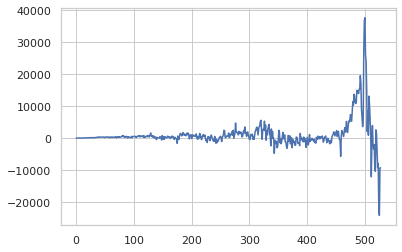

In [8]:
covid_per_hari['Selisih Kasus dan Sembuh'] = covid_per_hari['Perkembangan Kasus']-covid_per_hari['Sembuh']
plt.plot(covid_per_hari['Selisih Kasus dan Sembuh'])

In [9]:
masih_korone = []
kalkulasi = 0

for i in range(len(covid_per_hari)):
  kalkulasi += covid_per_hari['Perkembangan Kasus'].iloc[i] - (covid_per_hari['Sembuh'].iloc[i] + covid_per_hari['Meninggal'].iloc[i])
  masih_korone.append(kalkulasi)

covid_per_hari['Masih Positif'] = masih_korone

Text(0.5, 1.0, 'Masyarakat yang masih positif vs Sembuh')

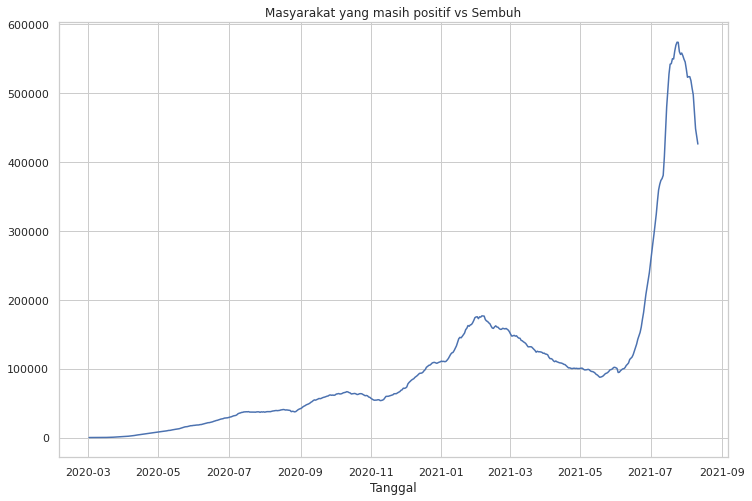

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(covid_per_hari['tanggal'], covid_per_hari['Masih Positif'], label='Pasien Masih Positif')
plt.xlabel('Tanggal')
plt.title('Masyarakat yang masih positif vs Sembuh')

Text(0.0, 1.0, 'Perbandingan jumlah kasus vs jumlah sembuh vs meninggal vs Pasien Masih Positif')

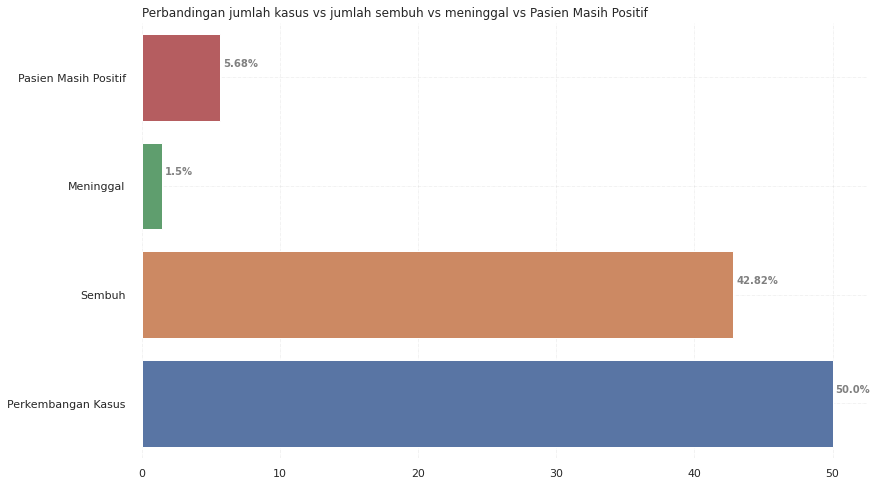

In [11]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize =(13, 8))
bar_x = ['Perkembangan Kasus', 'Sembuh', 'Meninggal', 'Pasien Masih Positif']
jumlah_kasus = np.sum(covid_per_hari['Perkembangan Kasus'])
jumlah_sembuh = np.sum(covid_per_hari['Sembuh'])
jumlah_meninggal = np.sum(covid_per_hari['Meninggal'])
pasien_masih_positif = jumlah_kasus - (jumlah_sembuh+jumlah_meninggal)
persen = jumlah_kasus+jumlah_sembuh+jumlah_meninggal+pasien_masih_positif
bar_y = [(jumlah_kasus/persen)*100, (jumlah_sembuh/persen)*100, (jumlah_meninggal/persen)*100, (pasien_masih_positif/persen)*100]

sns.barplot(x=bar_y, y=bar_x, orient = 'h')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2))+'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Perbandingan jumlah kasus vs jumlah sembuh vs meninggal vs Pasien Masih Positif',
             loc ='left', )

Text(0.0, 1.0, 'Perbandingan jumlah sembuh vs jumlah meninggal')

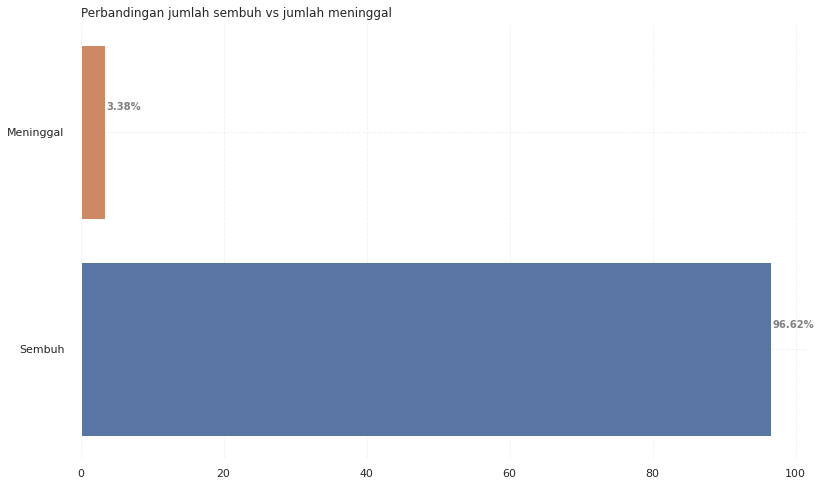

In [12]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize =(13, 8))
bar_x = ['Sembuh', 'Meninggal']
jumlah_sembuh = np.sum(covid_per_hari['Sembuh'])
jumlah_meninggal = np.sum(covid_per_hari['Meninggal'])
persen = jumlah_sembuh+jumlah_meninggal
bar_y = [(jumlah_sembuh/persen)*100, (jumlah_meninggal/persen)*100]

sns.barplot(x=bar_y, y=bar_x, orient = 'h')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2))+'%',
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Perbandingan jumlah sembuh vs jumlah meninggal',
             loc ='left', )

# Kasus Per Provinsi

In [13]:
provinsi = pd.read_csv('https://raw.githubusercontent.com/mohripan/Machine-Learning/main/Lomba/Dataset/Kabeh/Data_Harian_Kasus_per_Provinsi_COVID-19_Indonesia.csv')
provinsi.head()

,X,Y,FID,Kode_Provi,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni
0,96.909523,4.225082,1,11,Aceh,10814,9367,432
1,99.057888,2.184779,2,12,Sumatera Utara,29198,25952,965
2,100.466805,-0.851914,3,13,Sumatera Barat,36268,33058,783
3,101.812892,0.510526,4,14,Riau,42698,37374,1050
4,103.599320,-1.617750,5,15,Jambi,7407,5987,108


In [14]:
provinsi = provinsi[provinsi['Provinsi'] !='Indonesia']

Text(0.0, 1.0, 'Jumlah Kasus Per Provinsi')

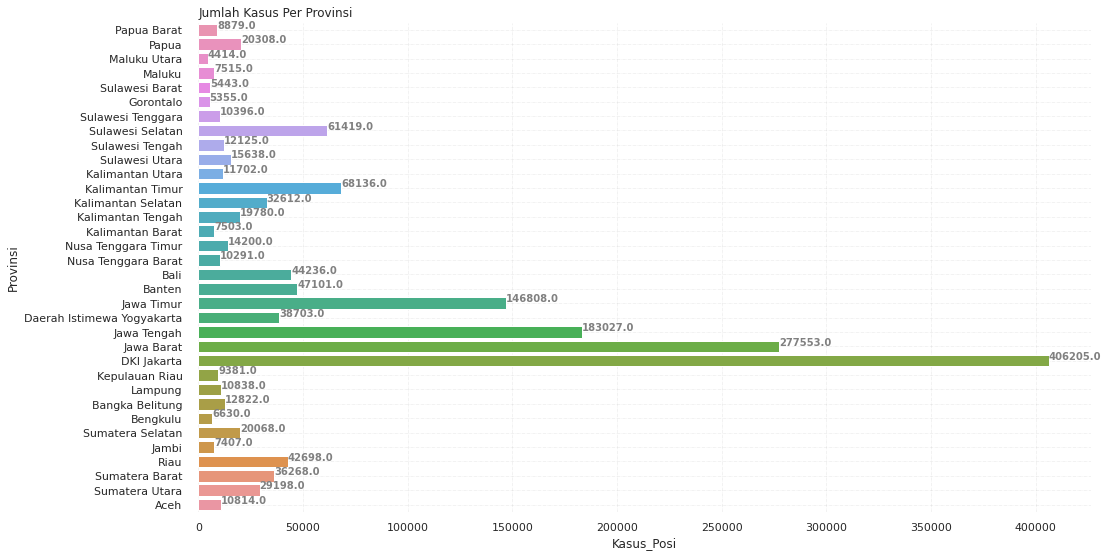

In [15]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize =(16, 9))

sns.barplot(x='Kasus_Posi', y='Provinsi', orient = 'h', data=provinsi)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Jumlah Kasus Per Provinsi',
             loc ='left', )

In [16]:
!pip install geopandas

In [17]:
import plotly.express as px
import geopandas as gpd

In [18]:
provinsi.head()

,X,Y,FID,Kode_Provi,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni
0,96.909523,4.225082,1,11,Aceh,10814,9367,432
1,99.057888,2.184779,2,12,Sumatera Utara,29198,25952,965
2,100.466805,-0.851914,3,13,Sumatera Barat,36268,33058,783
3,101.812892,0.510526,4,14,Riau,42698,37374,1050
4,103.599320,-1.617750,5,15,Jambi,7407,5987,108


In [19]:
plt.figure(figsize=(26, 9))
fig = px.scatter(provinsi, x='X', y='Y', color='Provinsi', size='Kasus_Posi')
fig.show()

<Figure size 1872x648 with 0 Axes>

In [20]:
vaksin = pd.read_csv('https://raw.githubusercontent.com/mohripan/Machine-Learning/main/Lomba/Dataset/Kabeh/vasin%20dosis%201%20dan%20lengkap.csv')
vaksin.head()

,DD-MM-YY,minimal 1 dosis,dosis lengkap
0,22-Jan-21,132,NaN
1,23-Jan-21,NaN,NaN
2,24-Jan-21,149.242,NaN
3,25-Jan-21,161.959,NaN
4,26-Jan-21,245.685,NaN


In [21]:
vaksin['minimal 1 dosis'] = vaksin['minimal 1 dosis'].str.replace('.','')
vaksin['tanggal'] = pd.to_datetime(vaksin['DD-MM-YY'])

In [22]:
vaksin = vaksin.drop('DD-MM-YY', axis=1)
vaksin['dosis lengkap'] = vaksin['dosis lengkap'].str.replace('.','')

In [23]:
vaksin['minimal 1 dosis'] = vaksin['minimal 1 dosis'].astype(float)
vaksin['dosis lengkap'] = vaksin['dosis lengkap'].astype(float)
vaksin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   minimal 1 dosis  165 non-null    float64       
 1   dosis lengkap    160 non-null    float64       
 2   tanggal          209 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.0 KB


In [24]:
import math
kalkulasi = 0
for i in range(len(vaksin)):
  if math.isnan(vaksin['minimal 1 dosis'].iloc[i]):
    vaksin['minimal 1 dosis'].iloc[i] = kalkulasi
  else:
    kalkulasi = vaksin['minimal 1 dosis'].iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
import math
kalkulasi = 0
for i in range(len(vaksin)):
  if math.isnan(vaksin['dosis lengkap'].iloc[i]):
    vaksin['dosis lengkap'].iloc[i] = kalkulasi
  else:
    kalkulasi = vaksin['dosis lengkap'].iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
vaksin.head()

,minimal 1 dosis,dosis lengkap,tanggal
0,132.0,0.0,2021-01-22
1,132.0,0.0,2021-01-23
2,149242.0,0.0,2021-01-24
3,161959.0,0.0,2021-01-25
4,245685.0,0.0,2021-01-26


In [47]:
covid_per_hari['minimal 1 dosis'] = 0
value = np.array(vaksin['minimal 1 dosis']).reshape(-1, 1)

In [71]:
for i in range(len(vaksin)-1):
  try:
    covid_per_hari['minimal 1 dosis'].iloc[i+326] = vaksin['minimal 1 dosis'].iloc[i]
  except:
    pass

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
covid_per_hari['minimal 1 dosis']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
523    49801823.0
524    50497940.0
525    51181322.0
526    51759158.0
527    51759158.0
Name: minimal 1 dosis, Length: 528, dtype: float64

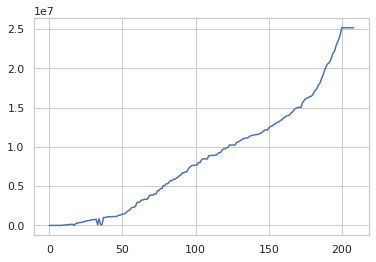

In [73]:
plt.plot(vaksin['dosis lengkap'])

In [74]:
covid_per_hari['dosis lengkap'] = 0
for i in range(len(vaksin)-1):
  try:
    covid_per_hari['dosis lengkap'].iloc[i+326] = vaksin['dosis lengkap'].iloc[i]
  except:
    pass

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
covid_per_hari['dosis lengkap']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
523    23345264.0
524    23777323.0
525    24481296.0
526    25174788.0
527    25174788.0
Name: dosis lengkap, Length: 528, dtype: float64

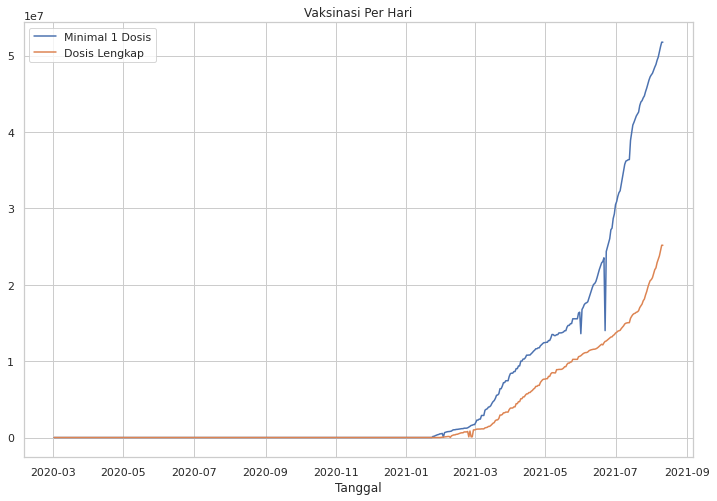

In [76]:
plt.figure(figsize=(12, 8))
plt.plot(covid_per_hari['tanggal'], covid_per_hari['minimal 1 dosis'],
         label='Minimal 1 Dosis')
plt.plot(covid_per_hari['tanggal'], covid_per_hari['dosis lengkap'], label='Dosis Lengkap')
plt.xlabel('Tanggal')
plt.title('Vaksinasi Per Hari')
plt.legend()

In [81]:
minimal_1_dosis = covid_per_hari['minimal 1 dosis'].iloc[-1]
dosis_lengkap = covid_per_hari['dosis lengkap'].iloc[-1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.0, 1.0, 'Minimal 1 dosis vs dosis lengkap')

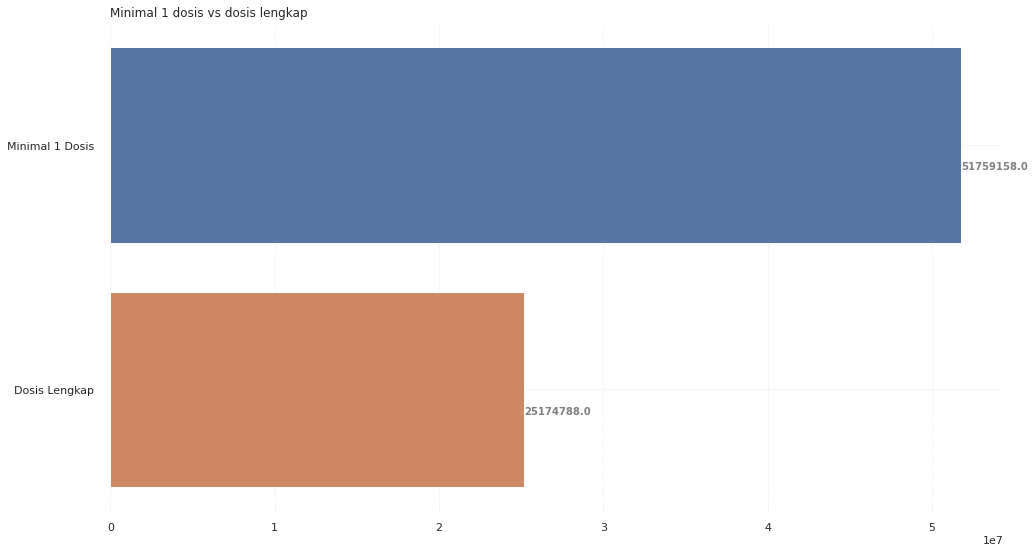

In [90]:
fig, ax = plt.subplots(figsize =(16, 9))

bar_x = ['Minimal 1 Dosis', 'Dosis Lengkap']
bar_y = [minimal_1_dosis, dosis_lengkap]
sns.barplot(bar_y, bar_x)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Minimal 1 dosis vs dosis lengkap',
             loc ='left', )

In [100]:
kalkulasi_kasus = 0
kasuses = []
kalkulasi_sembuh = 0
sembuhes = []
kalkulasi_meninggal = 0
meninggales = []

for i in range(len(covid_per_hari)):
  kalkulasi_kasus += covid_per_hari['Perkembangan Kasus'].iloc[i]
  kasuses.append(kalkulasi_kasus)
  kalkulasi_sembuh += covid_per_hari['Sembuh'].iloc[i]
  sembuhes.append(kalkulasi_sembuh)
  kalkulasi_meninggal += covid_per_hari['Meninggal'].iloc[i]
  meninggales.append(kalkulasi_meninggal)

covid_per_hari['jumlah total kasus'] = kasuses
covid_per_hari['jumlah total sembuh'] = sembuhes
covid_per_hari['jumlah total meninggal'] = meninggales
print(kasuses)

[2, 2, 2, 2, 4, 4, 6, 19, 27, 34, 34, 69, 96, 117, 134, 172, 227, 309, 369, 450, 514, 579, 685, 790, 893, 1046, 1155, 1285, 1414, 1528, 1677, 1790, 1986, 2092, 2273, 2491, 2738, 2956, 3293, 3512, 3842, 4241, 4557, 4839, 5136, 5516, 5923, 6248, 6575, 6760, 7135, 7418, 7775, 8211, 8607, 8882, 9096, 9511, 9771, 10118, 10551, 10843, 11192, 11587, 12071, 12438, 12776, 13112, 13645, 14032, 14265, 14749, 15438, 16006, 16496, 17025, 17514, 18010, 18496, 19189, 20162, 20796, 21745, 22271, 22750, 23165, 23851, 24538, 25216, 25773, 26473, 26940, 27549, 28233, 28818, 29521, 30514, 31186, 32033, 33075, 34316, 35295, 36406, 37420, 38277, 39294, 40400, 41431, 42762, 43803, 45029, 45891, 46845, 47896, 49009, 50187, 51427, 52812, 54010, 55092, 56385, 57770, 59394, 60695, 62142, 63749, 64958, 66226, 68079, 70736, 72347, 74018, 75699, 76981, 78572, 80094, 81668, 83130, 84882, 86521, 88214, 89869, 91751, 93657, 95418, 97286, 98778, 100303, 102051, 104432, 106336, 108376, 109936, 111455, 113134, 115056, 11

In [101]:
covid_per_hari['jumlah total kasus']

0            2
1            2
2            2
3            2
4            4
        ...   
523    3639639
524    3666054
525    3686763
526    3718844
527    3749469
Name: jumlah total kasus, Length: 528, dtype: int64

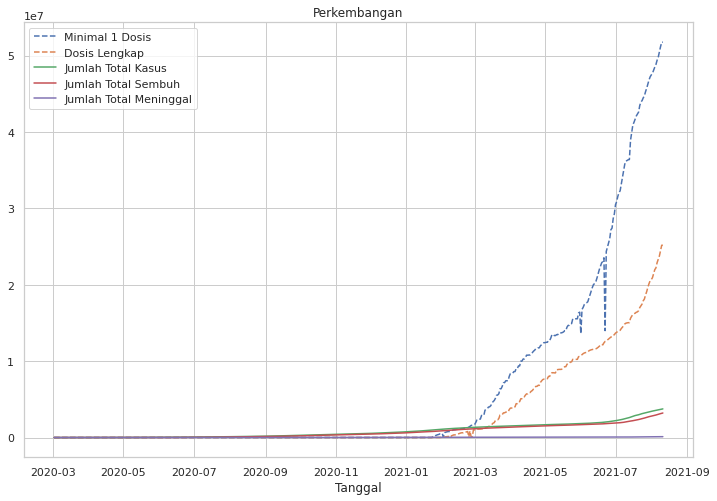

In [102]:
plt.figure(figsize=(12, 8))
plt.plot(covid_per_hari['tanggal'], covid_per_hari['minimal 1 dosis'],
         label='Minimal 1 Dosis', linestyle='dashed')
plt.plot(covid_per_hari['tanggal'], covid_per_hari['dosis lengkap'], label='Dosis Lengkap',linestyle='dashed')
plt.plot(covid_per_hari['tanggal'], covid_per_hari['jumlah total kasus'],
         label='Jumlah Total Kasus')
plt.plot(covid_per_hari['tanggal'], covid_per_hari['jumlah total sembuh'], label='Jumlah Total Sembuh')
plt.plot(covid_per_hari['tanggal'], covid_per_hari['jumlah total meninggal'],
         label='Jumlah Total Meninggal')
plt.xlabel('Tanggal')
plt.title('Perkembangan')
plt.legend()